# FlyLeads
### Visualizing the processed Reddit posts
1. This Script queries up to 300 processed posts from the proc_posts table on the FlyLeads_user.db
2. Plots on a map the destinations mentioned on the queried Reddit posts
3. Plots the destinations most mentioned on the queried Reddit posts

In [13]:
#!pip install folium

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [15]:
# Get relevant cols from proc_posts table
def query_proc_posts():
    conn = sqlite3.connect('FlyLeads_user.db')
    c = conn.cursor()

    sql_query = "SELECT Post_ID, Latitude, Longitude, Country_Full_Name\
    FROM proc_posts\
    LIMIT 300"

    proc_post_df = pd.read_sql_query(sql_query, conn)
    
    c.close()
    conn.close()

    return proc_post_df

In [16]:
proc_post_df = query_proc_posts()

In [17]:
proc_post_df.describe()

,Latitude,Longitude
count,215.000000,215.000000
mean,30.174655,-0.569373
std,26.027570,80.992554
min,-45.030151,-155.665857
25%,24.419675,-73.988611
50%,39.320980,7.447447
75%,45.767973,31.727927
max,67.922230,175.770998


In [21]:
# Drop rows with missing latitude and longitude values
proc_post_df = proc_post_df.dropna(subset=['Latitude', 'Longitude'])

In [22]:
map = folium.Map(location=[proc_post_df['Latitude'].mean(), proc_post_df['Longitude'].mean()], zoom_start=2)
for index, row in proc_post_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Country_Full_Name']).add_to(map)
map

In [23]:
map_center = [0, 0] 
world_map = folium.Map(location=map_center, zoom_start=2)

# Create a MarkerCluster layer to group destinations
marker_cluster = MarkerCluster().add_to(world_map)
for index, row in proc_post_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(marker_cluster)

world_map

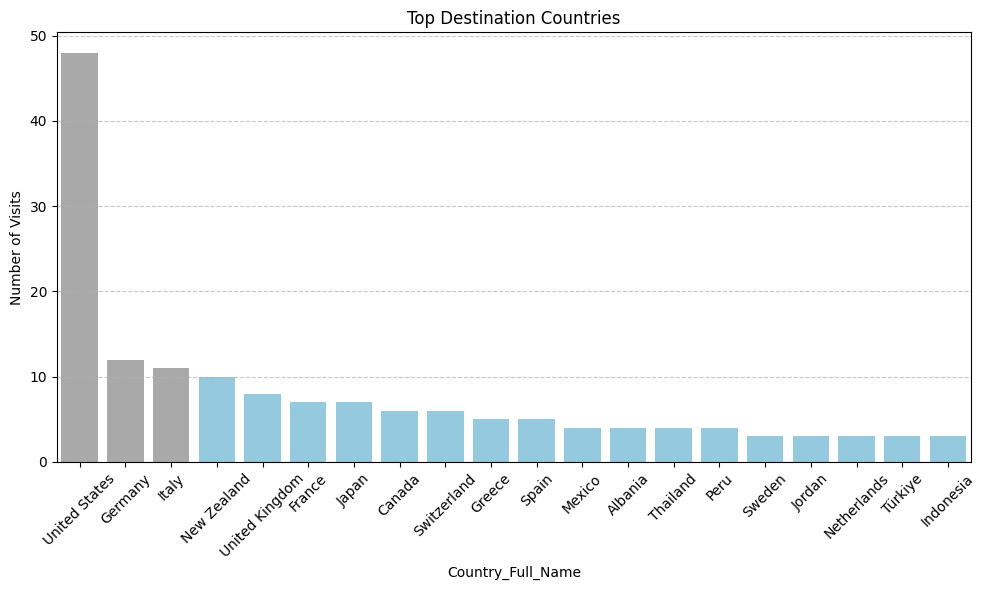

In [33]:
import seaborn as sns

# Get the top 20 destinations
top_destinations = proc_post_df['Country_Full_Name'].value_counts().head(20)

# Create a color palette
palette = ['skyblue' if country not in top_destinations.head(3).index else 'darkgrey' for country in top_destinations.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_destinations.index, y=top_destinations.values, hue=top_destinations.index, palette=palette, legend=False)
plt.title('Top Destination Countries')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
